## Importing data

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

2022-12-08 22:46:35 Configured OSMnx 1.1.1
2022-12-08 22:46:35 HTTP response caching is on


In [2]:
#Importing jalisco elections participation data
gdf = gpd.read_file("../../data/external/gobernance/jalisco/secciones_jalisco2021.gpkg")

In [3]:
gdf

,ID,ENTIDAD,DISTRITO,MUNICIPIO,SECCION,TIPO,CONTROL,Geometry1_,ayun_votos,dip_votos,listanominal,parti_ayun,parti_dip,geometry
0,1,14,2,75,2085,4,1,1=X<R,181,181,505.0,0.358416,0.358416,"MULTIPOLYGON (((-102.48286 21.32737, -102.4884..."
1,2,14,2,75,2087,4,2,1=X<R,377,377,771.0,0.488975,0.488975,"MULTIPOLYGON (((-102.35864 21.41105, -102.3580..."
2,3,14,2,75,2086,4,3,1=X<R,269,270,747.0,0.360107,0.361446,"MULTIPOLYGON (((-102.42158 21.36718, -102.4180..."
3,4,14,2,75,2067,3,4,1=X<Rq,3497,3509,6288.0,0.556139,0.558047,"MULTIPOLYGON (((-102.34739 21.24847, -102.3454..."
4,5,14,2,75,2088,4,5,1=X<R,222,221,710.0,0.312676,0.311268,"MULTIPOLYGON (((-102.31325 21.39300, -102.3124..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3565,3618,14,1,84,2202,3,2320,1=X<Kf,495,495,899.0,0.550612,0.550612,"MULTIPOLYGON (((-103.72006 20.58449, -103.7179..."
3566,3619,14,1,84,2206,3,2324,1=X<Kf,1047,1048,1685.0,0.621365,0.621958,"MULTIPOLYGON (((-103.78016 20.61688, -103.7788..."
3567,3620,14,1,84,2204,4,2326,1=X<Kf,809,809,1291.0,0.626646,0.626646,"MULTIPOLYGON (((-103.70869 20.58377, -103.7089..."
3568,3621,14,11,41,1380,2,1271,1=X<rgp,1418,1416,2832.0,0.500706,0.500000,"MULTIPOLYGON (((-103.27986 20.67923, -103.2788..."


## Data treatment

### Creating parti_max

In [4]:
#There is data for two types of elections. Ayuntamientos (ayun) and diputados(dip)
gdf[["parti_ayun","parti_dip"]]

,parti_ayun,parti_dip
0,0.358416,0.358416
1,0.488975,0.488975
2,0.360107,0.361446
3,0.556139,0.558047
4,0.312676,0.311268
...,...,...
3565,0.550612,0.550612
3566,0.621365,0.621958
3567,0.626646,0.626646
3568,0.500706,0.500000


In [5]:
#Finding the highest participation percentaje. axis=1 indicates to find the max per row, not column.
gdf["parti_max"] = gdf[["parti_ayun","parti_dip"]].max(axis=1)

### Removing higher than 1 values

In [6]:
#idx gets all higher than 1 values
idx = gdf["parti_max"] > 1
gdf.loc[idx]

,ID,ENTIDAD,DISTRITO,MUNICIPIO,SECCION,TIPO,CONTROL,Geometry1_,ayun_votos,dip_votos,listanominal,parti_ayun,parti_dip,geometry,parti_max
1355,1378,14,6,120,3031,2,1469,1=X<KeZ,910,233213,2450.0,0.371429,95.188980,"MULTIPOLYGON (((-103.42565 20.73332, -103.4256...",95.188980
2175,2203,14,15,65,1859,2,2570,1=X<v7V,727,1537,1441.0,0.504511,1.066620,"MULTIPOLYGON (((-102.76757 20.35604, -102.7671...",1.066620
2180,2208,14,15,65,1863,2,2575,1=X<v5,347,684,636.0,0.545597,1.075472,"MULTIPOLYGON (((-102.77334 20.35211, -102.7728...",1.075472
2302,2330,14,19,104,2741,4,2732,1=X<Pp,234,346,300.0,0.780000,1.153333,"MULTIPOLYGON (((-103.48624 19.35941, -103.4869...",1.153333
2409,2437,14,15,34,492,4,2944,1=X<p,74,207,161.0,0.459627,1.285714,"MULTIPOLYGON (((-102.23435 20.48814, -102.2330...",1.285714
2463,2491,14,5,69,1944,2,3032,1=X<Hs,865,3342,1895.0,0.456464,1.763588,"MULTIPOLYGON (((-105.22272 20.65296, -105.2220...",1.763588
2597,2625,14,2,55,1741,4,3221,1=X<e,507,833,803.0,0.631382,1.037360,"MULTIPOLYGON (((-101.84758 21.76201, -101.8453...",1.037360
3324,3374,14,1,5,44,4,2314,1=X<K-,316,570,524.0,0.603053,1.087786,"MULTIPOLYGON (((-103.74685 20.90430, -103.7468...",1.087786
3385,3438,14,1,95,2409,4,2815,1=X<I,353,151,242.0,1.458678,0.623967,"MULTIPOLYGON (((-103.96915 21.25660, -103.9683...",1.458678


In [7]:
#Changing all values>1 to 1
gdf.loc[idx,"parti_max"] = 1
idx = gdf["parti_max"] > 1
gdf.loc[idx]

,ID,ENTIDAD,DISTRITO,MUNICIPIO,SECCION,TIPO,CONTROL,Geometry1_,ayun_votos,dip_votos,listanominal,parti_ayun,parti_dip,geometry,parti_max


### Upload data to database

In [8]:
aup.gdf_to_db_slow(gdf,"participacion_jalisco", 'governance', if_exists='replace')

## Linking Data -to-> nodes -to-> hex

### Downloading previous data from database and downloading nodes and edges

In [10]:
#Previous data
jlsdata = aup.gdf_from_db("participacion_jalisco", 'governance')
jlsdata.head(1)

,ID,ENTIDAD,DISTRITO,MUNICIPIO,SECCION,TIPO,CONTROL,Geometry1_,ayun_votos,dip_votos,listanominal,parti_ayun,parti_dip,geometry,parti_max
0,1,14,2,75,2085,4,1,1=X<R,181,181,505.0,0.358416,0.358416,"MULTIPOLYGON (((-102.48286 21.32737, -102.4884...",0.358416


In [11]:
#Download nodes and edges [Función en aup>Data]
#gdf_from_db(name[#de donde busca nodes y edges], schema[#ubicación de edges y nodes]):
G,nodes,edges = aup.graph_from_hippo(jlsdata, 'osmnx')

2022-12-08 23:00:41 Created graph from node/edge GeoDataFrames


In [12]:
nodes.head(1)

,x,y,street_count,geometry
osmid,,,,
28751344,-103.306309,20.711533,3,POINT (-103.30631 20.71153)


In [13]:
edges.head(1)

,,,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,bridge,ref,junction,tunnel,access,width,service
u,v,key,,,,,,,,,,,,,,,
1392690697,6496356196,0,692081806,False,None,None,path,None,153.187,"LINESTRING (-103.49719 19.16426, -103.49709 19...",None,None,None,None,None,None,None


### Participation to nodes

In [22]:
#Function in aup>analysis
#socio_polygon_to_points(nodes,gdf_socio[#info que queremos de data],column_start=0 [#4 porque ahí comienza la info que queremos],
#column_end=-1,cve_column="CVEGEO" [#Normalmente es CVEGEO, pero aquí son las secciones],avg_column=None[#datos]):
jls_nodes = aup.socio_polygon_to_points(nodes,jlsdata[["SECCION","geometry","parti_max"]],column_start=2,column_end=-1,cve_column="SECCION",avg_column=["parti_max"])

In [23]:
jls_nodes.head(2)

,x,y,street_count,geometry,SECCION,parti_max
osmid,,,,,,
28751344,-103.306309,20.711533,3,POINT (-103.30631 20.71153),1241,0.435
28757777,-103.306806,20.710093,4,POINT (-103.30681 20.71009),1241,0.435


<AxesSubplot:>

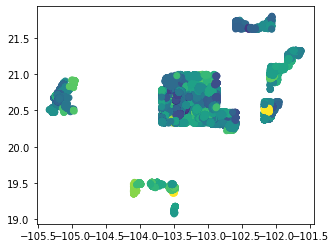

In [24]:
jls_nodes.plot("parti_max")

In [25]:
#Add weight=1 to all items to specify (later) that they all matter the same
jls_nodes["weight"] = 1

### Linking participation data to Guadalajara hex

In [26]:
#Downloading Guadalajara hex from database
hex8_gdl = gpd.read_file("../../data/external/gobernance/jalisco/hex8_gdl.gpkg")  

<AxesSubplot:>

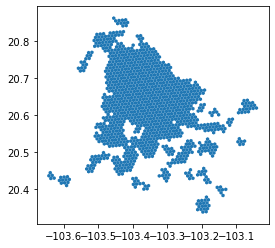

In [28]:
hex8_gdl.plot()

In [29]:
#Linking participation data to hex.
#Function in aup>analysys
#socio_points_to_polygon(gdf_polygon,gdf_socio,cve_column[#La que tenga el ID del polígono],string_columns,
#wgt_dict=None[#Diccionario con dato:peso],avg_column=None[#datos]):
hex8_partigdl = aup.socio_points_to_polygon(hex8_gdl,jls_nodes,cve_column="hex_id_8",string_columns=["SECCION"],wgt_dict={"parti_max":"weight"},avg_column=["parti_max"])
hex8_partigdl.head(1)

,x,y,street_count,parti_max,weight,hex_id_8
0,-16942.429688,3396.84082,495.0,0.478206,164.0,88498c9431fffff


In [31]:
#keeping just id and parti_max
hex8_partigdl = hex8_partigdl[["hex_id_8","parti_max"]].copy()
hex8_partigdl.head(1)

,hex_id_8,parti_max
0,88498c9431fffff,0.478206


### Adding city and geometry

In [32]:
#Original hex8 data
hex8_gdl.head(1)

,hex_id_8,max_escuelas,max_preescolar,max_primaria,max_secundaria,max_servicios comunitarios,max_salud,max_guarderías,max_asistencia social,max_comercio,...,pobtot,pobfem,pobmas,pob_0a14,pob_15a24,pob_25a59,p_60ymas,dens_pobha,city,geometry
0,8849abc9ebfffff,24.964994,24.705283,23.051588,20.315681,51.98701,40.473661,51.182696,22.870778,25.074755,...,273.16855,135.64044,137.52809,75.146068,48.988765,117.932583,31.101124,3.153691,Guadalajara,"POLYGON ((-103.61319 20.42802, -103.61772 20.4..."


In [34]:
#Keeping just the id, city and geometry
hex8_gdl = hex8_gdl[["hex_id_8","city","geometry"]].copy()
hex8_gdl.head(1)

,hex_id_8,city,geometry
0,8849abc9ebfffff,Guadalajara,"POLYGON ((-103.61319 20.42802, -103.61772 20.4..."


In [36]:
#Merging
hex8_partigdl = hex8_gdl.merge(hex8_partigdl, on= "hex_id_8")
hex8_partigdl.head(1)

,hex_id_8,city,geometry,parti_max
0,8849abc9ebfffff,Guadalajara,"POLYGON ((-103.61319 20.42802, -103.61772 20.4...",0.5147


<AxesSubplot:>

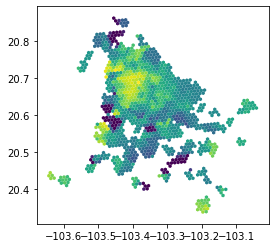

In [37]:
hex8_partigdl.plot("parti_max")

## Upload to database

In [38]:
aup.gdf_to_db_slow(hex8_partigdl,"participacion_gdl_hexres8", 'governance', if_exists='replace')